<a href="https://colab.research.google.com/github/saurabhraut02/ML_Repo/blob/Lab-03/LAB_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LAB 03**

# **TASK 1:** Perform Logistic Regression

In [1]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

Generate the Dataset

In [2]:
x, y = make_classification(
    n_samples=300,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

Visualize the data

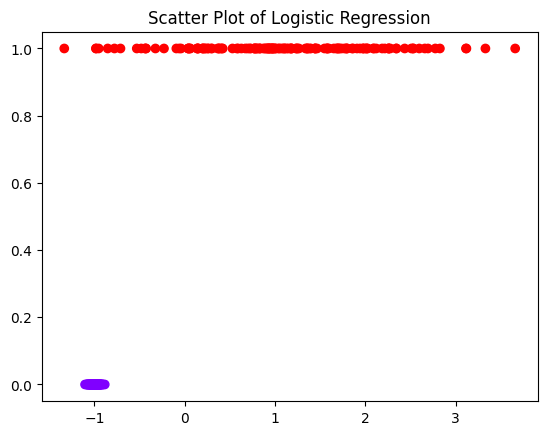

[[ 0.13603048]
 [-1.04094323]
 [-1.04790867]
 [ 0.90803591]
 [ 1.44428033]
 [ 1.44454265]
 [-1.07817645]
 [-1.02898868]
 [ 0.22899738]
 [-0.99056482]
 [-1.0644831 ]
 [-0.97798007]
 [-0.96586889]
 [-0.9158384 ]
 [-0.99736027]
 [ 2.25656919]
 [ 1.35523494]
 [ 0.79990768]
 [-0.99301602]
 [ 0.03857973]
 [-0.9677198 ]
 [ 1.35169392]
 [ 2.50858278]
 [ 1.44192843]
 [-1.01645838]
 [-1.06991032]
 [-1.01061978]
 [ 0.20205892]
 [ 1.18400129]
 [ 3.65731253]
 [ 0.38063384]
 [-1.01639327]
 [ 1.9061729 ]
 [-1.00560531]
 [ 0.04141759]
 [ 3.11747729]
 [-1.02240807]
 [-1.02605181]
 [ 0.66961364]
 [-0.9650405 ]
 [-1.00886041]
 [ 2.11931916]
 [ 1.79476699]
 [-1.02341094]
 [ 0.0607927 ]
 [ 1.79724268]
 [ 1.00121067]
 [-1.03232035]
 [-1.00488489]
 [-0.43217051]
 [-0.42825844]
 [-0.0416709 ]
 [ 0.2236944 ]
 [-1.03177727]
 [ 1.93959437]
 [-0.92676821]
 [-1.00932475]
 [-0.97227401]
 [-0.99308104]
 [ 0.03787158]
 [ 1.08965273]
 [ 1.36303101]
 [-0.96365805]
 [-0.93274864]
 [ 0.14883589]
 [ 1.5465115 ]
 [-1.02241

In [3]:
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()
print(x, y)

Split the dataset


In [4]:
#split dataset
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state=1, test_size=0.5)

In [5]:
#Perform Logistic Regression
log_reg = LogisticRegression()  #logistic regression object
log_reg.fit(x_train, y_train)

LogisticRegression()

In [6]:

print(log_reg.coef_)
print(log_reg.intercept_)


[[3.40632234]]
[1.29339739]


In [7]:
y_pred =log_reg.predict(x_test)

# **Task2:**   Evaluate the performance of  the model, study confusion matrix, ROC,AUC


In [8]:
confusion_matrix(y_test, y_pred)

array([[76,  0],
       [ 4, 70]])

Plotting  ROC Curves

<ipython-input-9-316de9203d97>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})


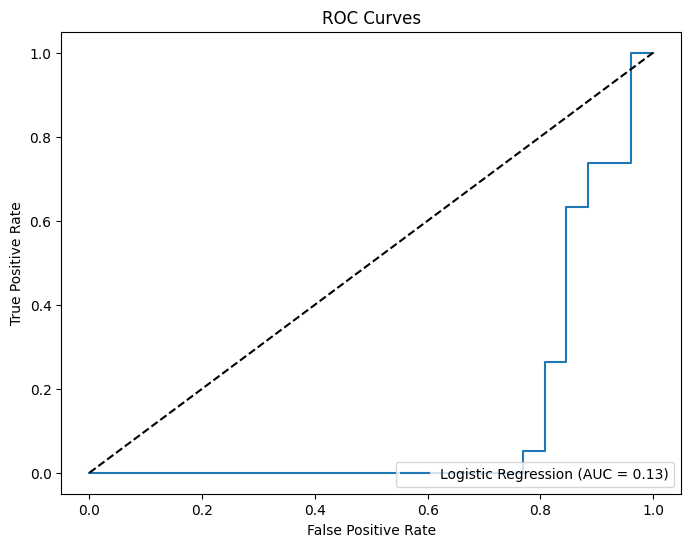

In [9]:
!pip install scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

data = pd.read_csv('/content/Iris.csv')
data['Species'] = data['Species'].replace({'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3})
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = data['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# Convert to binary classification for ROC curve
y_test_binary = (y_test == 1).astype(int)  # Example: consider class 1 as positive
lr_probs = lr.predict_proba(X_test)[:, 1]
lr_fpr, lr_tpr, _ = roc_curve(y_test_binary, lr_probs)
lr_auc = auc(lr_fpr, lr_tpr)



# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

# **Task 3:**  Perform the task of  Multi-Class Logistic Regression  on iris data set

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import seaborn as sn


In [11]:
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
data['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:

data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3 })
data


<ipython-input-13-2d458ccdfb0c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'] = data['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3 })


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,3
146,147,6.3,2.5,5.0,1.9,3
147,148,6.5,3.0,5.2,2.0,3
148,149,6.2,3.4,5.4,2.3,3


In [14]:
x_train, x_test, y_train, y_test = train_test_split(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], data['Species'], train_size=0.2)

x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
90,5.5,2.6,4.4,1.2
24,4.8,3.4,1.9,0.2
103,6.3,2.9,5.6,1.8
111,6.4,2.7,5.3,1.9
112,6.8,3.0,5.5,2.1
146,6.3,2.5,5.0,1.9
10,5.4,3.7,1.5,0.2
4,5.0,3.6,1.4,0.2
122,7.7,2.8,6.7,2.0


In [15]:
y_train

,Species
137,3
90,2
24,1
103,3
111,3
112,3
146,3
10,1
4,1
122,3


In [16]:

from sklearn import linear_model
mymodel=linear_model.LogisticRegression()
mymodel.fit(x_train, y_train)

LogisticRegression()

In [17]:
mymodel.predict(x_test)

array([3, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 3, 1, 3, 1, 3,
       1, 2, 3, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3,
       3, 3, 1, 3, 3, 1, 3, 3, 3, 1])

In [18]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
83,6.0,2.7,5.1,1.6
84,5.4,3.0,4.5,1.5
57,4.9,2.4,3.3,1.0
47,4.6,3.2,1.4,0.2
39,5.1,3.4,1.5,0.2
...,...,...,...,...
18,5.7,3.8,1.7,0.3
105,7.6,3.0,6.6,2.1
144,6.7,3.3,5.7,2.5
134,6.1,2.6,5.6,1.4


In [19]:
predicted_output = mymodel.predict(x_test)
predicted_output

array([3, 3, 2, 1, 1, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 3, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 3, 1, 1, 3,
       3, 1, 2, 3, 2, 3, 1, 2, 2, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 1, 3, 3,
       3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 3, 2, 3, 3, 1, 3, 1, 3,
       1, 2, 3, 1, 3, 1, 2, 1, 1, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 1, 3, 3,
       3, 3, 1, 3, 3, 1, 3, 3, 3, 1])

In [20]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[39,  0,  0],
       [ 0, 27, 18],
       [ 0,  0, 36]])

Text(33.22222222222222, 0.5, 'Actual Value')

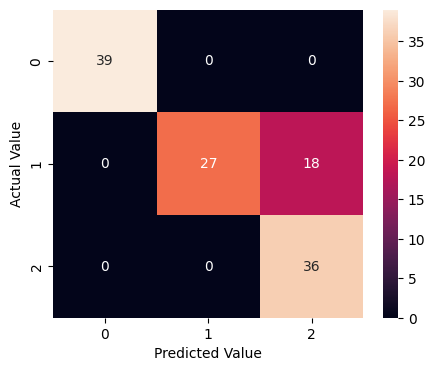

In [21]:
import seaborn as sn
plt.figure(figsize=(5,4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

# **Task4:**  Underfitting and Overfitting in Machine Learning Bias and Variance

In [24]:
mymodel.score(x_train, y_train)


0.9

In [25]:
mymodel.score(x_test, y_test)

0.85